In [1]:
import numpy as np
from scipy import spatial
import matplotlib.pyplot as plt

import logging
LOGGER = logging.getLogger(__name__)

from pynhhd import create_logger
create_logger(logging.INFO)

from utils import drawing, fields

d = 1
n = 101 

# -----------------------------------------------
# create points
points = d*np.indices((n,n))
points = [points[d] for d in range(2)]
points = np.moveaxis(points, 0, -1)
points = points.reshape(-1, points.shape[-1])

npoints = points.shape[0]

# -----------------------------------------------
# create a Delaunay triangulation
simplices = spatial.Delaunay(points).simplices
nfaces = simplices.shape[0]

simplices2 = simplices[np.random.permutation(nfaces)]
simplices = simplices2


# -----------------------------------------------
# create PC vector field
centroids = np.zeros((nfaces, 2))
for i in range(simplices.shape[0]):
    centroids[i] = 1.0/3.0 * (points[simplices[i][0]] + points[simplices[i][1]] + points[simplices[i][2]])

c = np.array([(n-1)/2,(n-1)/2])
vf = fields.create_criticalPoint2D(centroids, np.array([(n-1)/2,(n-1)/2]), 1, 1, 0,1)
mvf = np.linalg.norm(vf, axis=1)

LOGGER.info('vf = {}, {}, {}'.format(mvf.shape, mvf.min(), mvf.max()))

# -----------------------------------------------


plt.figure()
#plt.scatter(points[:,0],points[:,1], c=p, s=60, cmap=plt.cm.jet) #discretize_colormap(plt.cm.jet,3))
plt.triplot(points[:,0],points[:,1], simplices, '-', alpha=0.2)
plt.gca().set_aspect('equal', 'box')


vrng = (0, 196.1)
k = 50

plt.figure()
drawing.draw_quivers(centroids, vf, vrng, k)
plt.gca().set_aspect('equal', 'box')
#plt.xlim([-0.1,n-1+0.1])
#plt.ylim([-0.1,n-1+0.1])
plt.show()

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 2 Axes>

In [2]:
import sys
from pynhhd import nHHD

hhd = nHHD(points = points, simplices = simplices)
hhd.decompose(vf)

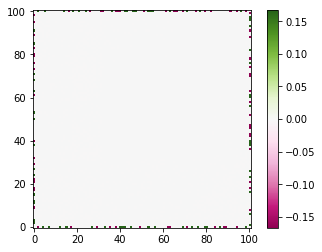

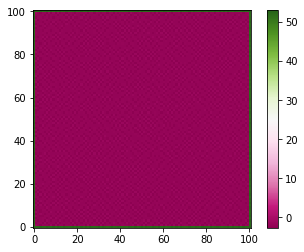

In [3]:
plt.figure()
plt.imshow(hhd.div.reshape(n,n),origin='lower',cmap=plt.cm.PiYG) #,vmax=numpy.abs(n).max(), vmin=-numpy.abs(n).max())
plt.xlim([-0.5,n-1+0.5])
plt.ylim([-0.5,n-1+0.5])
plt.colorbar()

plt.figure()
plt.imshow(hhd.curlw.reshape(n,n),origin='lower',cmap=plt.cm.PiYG) #,vmax=numpy.abs(n).max(), vmin=-numpy.abs(n).max())
plt.xlim([-0.5,n-1+0.5])
plt.ylim([-0.5,n-1+0.5])
plt.colorbar()

plt.show()

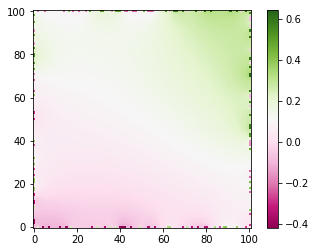

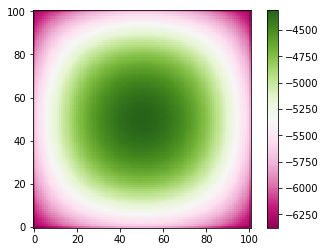

In [4]:
plt.figure()
plt.imshow(hhd.nD.reshape(n,n),origin='lower',cmap=plt.cm.PiYG) #,vmax=numpy.abs(n).max(), vmin=-numpy.abs(n).max())
plt.xlim([-0.5,n-1+0.5])
plt.ylim([-0.5,n-1+0.5])
plt.colorbar()

plt.figure()
plt.imshow(hhd.nRu.reshape(n,n),origin='lower',cmap=plt.cm.PiYG) #,vmax=numpy.abs(n).max(), vmin=-numpy.abs(n).max())
plt.xlim([-0.5,n-1+0.5])
plt.ylim([-0.5,n-1+0.5])
plt.colorbar()


plt.show()

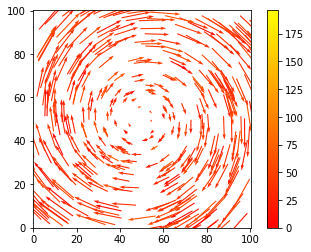

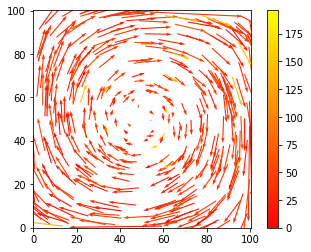

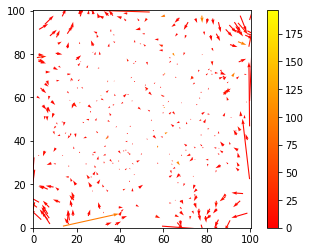

In [5]:

# ----------------------------------------------------------------
mvf = np.linalg.norm(vf, axis=1)
LOGGER.info('vf = {}, {}, {}'.format(mvf.shape, mvf.min(), mvf.max()))

mr = np.linalg.norm(hhd.r, axis=1)
md = np.linalg.norm(hhd.d, axis=1)
mh = np.linalg.norm(hhd.h, axis=1)

LOGGER.info('d = {}, {}'.format(md.min(), md.max())) #, numpy.linalg.norm(md)
LOGGER.info('r = {}, {}'.format(mr.min(), mr.max())) #, numpy.linalg.norm(mr)
LOGGER.info('h = {}, {}'.format(mh.min(), mh.max())) #, numpy.linalg.norm(mh)

#vrng = (0, 196.1)
vrng = (0, 196.1)
k = 50
# ----------------------------------------------------------------

plt.figure()
#plt.scatter(points[:,0],points[:,1], c=p, s=60, cmap=plt.cm.jet) #discretize_colormap(plt.cm.jet,3))
#plt.triplot(points[:,0],points[:,1], simplices, '-', alpha=0.2)

drawing.draw_quivers(centroids, vf, vrng, k)
plt.xlim([-0.1,n-1+0.1])
plt.ylim([-0.1,n-1+0.1])
#plt.savefig('fig1.png')
plt.gca().set_aspect('equal', 'box')

# ----------------------------------------------------------------

plt.figure()
drawing.draw_quivers(centroids, hhd.r, vrng, k)
#plt.imshow(hhd.nD.reshape(n,n),origin='lower',cmap=plt.cm.PiYG) #,vmax=numpy.abs(n).max(), vmin=-numpy.abs(n).max())
plt.xlim([-0.1,n-1+0.1])
plt.ylim([-0.1,n-1+0.1])
plt.gca().set_aspect('equal', 'box')
#plt.savefig('fig2.png')

plt.figure()
drawing.draw_quivers(centroids, hhd.h, vrng, k)
plt.xlim([-0.1,n-1+0.1])
plt.ylim([-0.1,n-1+0.1])
plt.gca().set_aspect('equal', 'box')
#plt.savefig('fig3.png')

plt.show()